# Decision theory project
Antoine JOFFROY
Lucas TEXIER

In [82]:
# Imports for the whole labwork

import numpy as np
import pulp
import pandas as pd
import numpy as np 
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from scipy.spatial.distance import pdist, squareform
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

##  Tasks 1:  Determination of the value function 

### a. The DM gives his preferences by comparing each pair of alternatives following the Macbeth questioning procedure.

![Image](./matrice_DM.png)

* The DM has given his preferences in this matrix with this scale of preferences : extrem, very strong, strong, moderate, weak, very weak, nul

### b. The analyst checks with the DM possible (inconsistencies) in the preferences especially transitivity

* The software ensures that the judgement is consistent and the transitivity is satisfied (manually verified)

### c. If the binary relation representing the preferences is a weak order, then a value function exists to represent these preferences.

* The binary relation is a weak order so a value function exists.

### d. Assess the value function (solving an optimization problem).


* First, the scale is initialized :

In [84]:
scale = {
    0: "Nulle",
    1: "Very Weak",
    2: "Weak",
    3: "Moderate",
    4: "Strong",
    5: "Very Strong"
}

* With that scale, the matrix of the DM is : 

In [85]:
#order of the social networks
social_networks = ["Sup", "Instagram", "LinkedIn", "X", "Facebook", "Tik Tok", "Inf"]

#-1 is used beacause it is a symetrical matrix
DM_matrix=np.array([[0,3,4,4,4,6,6],
                    [-1,0,3,4,4,5,5],
                    [-1,-1,0,4,4,5,5],
                    [-1,-1,-1,0,3,4,4],
                    [-1,-1,-1,-1,0,4,4],
                    [-1,-1,-1,-1,-1,0,2],
                    [-1,-1,-1,-1,-1,-1,0]])

In [86]:
'''
Define a function which resolves the optimization problem from the DM_matrix to find value the function
'''
def find_value_function(DM_matrix):
    # pulp solver is used
    optimization_problem = pulp.LpProblem("Value_Function", pulp.LpMinimize) #solving an optimization problem
    values = pulp.LpVariable.dicts("Value", range(len(DM_matrix)), lowBound=0)
    optimization_problem += pulp.lpSum([values[i] for i in range(len(DM_matrix))]) 

    for i in range(len(DM_matrix)):
        for j in range(len(DM_matrix[0])):
            if DM_matrix[i][j] != -1: # to only treat the upper diagonal
                optimization_problem += values[i] >= DM_matrix[i][j] + values[j]

    #solve the probleme and recup the value of each class
    optimization_problem.solve()
    value_function = [pulp.value(values[i]) for i in range(len(DM_matrix))]

    return value_function

* Application on our matrix of social networks

In [87]:
value_function = find_value_function(DM_matrix)

print("Our final value function :")
print(social_networks)
print(value_function)


Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /Users/bagafoufabrice/opt/anaconda3/lib/python3.9/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/yr/n_p4jzks6qv45jchfckvfsth0000gn/T/180658b363ae42f392a7b1d20ac4eba2-pulp.mps timeMode elapsed branch printingOptions all solution /var/folders/yr/n_p4jzks6qv45jchfckvfsth0000gn/T/180658b363ae42f392a7b1d20ac4eba2-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 33 COLUMNS
At line 90 RHS
At line 119 BOUNDS
At line 120 ENDATA
Problem MODEL has 28 rows, 7 columns and 42 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Presolve 0 (-28) rows, 0 (-7) columns and 0 (-42) elements
Empty problem - 0 rows, 0 columns and 0 elements
Optimal - objective value 65
After Postsolve, objective 65, infeasibilities - dual 0 (0), primal 0 (0)
Optimal objective 65 - 0 iterations time 0.002, Presolve 0.00
Option for printingOptions changed

### e. A ranking can be established regarding the value obtained by each Social network.


Thanks to the value function, the ranking is :
* 1. Instagram
* 2. LinkedIn
* 3. X 
* 4. Facebook
* 5. Tik Tok

# Data

In [1]:
import pandas as pd
import numpy as np 
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

In [88]:
df = pd.read_csv('/Users/bagafoufabrice/Downloads/PlasticsTrain.csv',sep=';')

df = df.drop('line',axis = 1)
df = df.drop('column',axis = 1)
df = df.drop('object',axis = 1)
Y = df['class']
big_df = df
df =df.drop('class',axis = 1)
df = df[df.columns].apply(lambda x: x.str.replace(',', '.')).astype(float)
X = df
X.head(5)

,3687cm-1,3665cm-1,3642cm-1,3620cm-1,3598cm-1,3577cm-1,3555cm-1,3534cm-1,3514cm-1,3493cm-1,...,1952cm-1,1945cm-1,1939cm-1,1933cm-1,1927cm-1,1920cm-1,1914cm-1,1908cm-1,1902cm-1,1896cm-1
0,-1.996200,-1.964828,-1.988133,-1.997992,-1.997096,-1.981858,-1.981858,-1.936146,-1.954073,-1.906568,...,-0.316504,-0.440196,-0.534309,-0.544168,-0.590777,-0.719846,-0.787070,-0.762869,-0.775418,-0.800515
1,-1.931995,-1.932870,-1.952113,-2.006342,-1.984475,-1.968731,-1.966982,-1.936369,-1.910129,-1.862897,...,-0.297249,-0.419702,-0.552651,-0.557899,-0.564896,-0.691723,-0.766069,-0.753824,-0.752949,-0.782688
2,-1.933060,-1.932180,-1.973558,-1.946266,-1.983243,-1.965635,-1.948907,-1.926897,-1.904007,-1.871432,...,-0.247100,-0.328977,-0.444309,-0.450472,-0.481286,-0.615986,-0.659126,-0.630953,-0.650322,-0.660887
3,-1.811951,-1.808491,-1.861257,-1.894992,-1.918348,-1.889802,-1.871637,-1.877692,-1.869907,-1.818871,...,-0.139874,-0.202155,-0.324123,-0.311147,-0.333638,-0.436575,-0.489341,-0.483286,-0.457335,-0.471175
4,-1.911310,-1.917137,-1.959097,-1.969587,-1.960263,-1.962594,-1.948607,-1.936952,-1.913641,-1.849535,...,-0.295847,-0.386761,-0.477674,-0.528959,-0.559263,-0.676984,-0.722441,-0.711951,-0.724772,-0.753911


## Tasks 2: Supervised classification using expected utility (application to plastics sorting problem)

## a)-b)

In [5]:
utility_matrice = [[1,0.25,0.5,0.75],[0.75,1,0.25,0.5],[0.5,0.75,1,0.25],[0.25,0.5,0.75,1]]

classes = list( Y.unique())
    
def new_EU(predicted, Pabs, Phips, Ppe, Ppp) :
    i = classes.index(predicted)
    return  (utility_matrice[i][0] * Pabs + utility_matrice[i][1] * Phips + utility_matrice[i][2] * Ppe + utility_matrice[0][3] * Ppp)

    
def Choice(Data_to_predict,model):
    a = model.predict_proba(Data_to_predict)  # Use predict_proba to get probabilities
    act1 = new_EU('ABS', a[0][0], a[0][1], a[0][2], a[0][3])
    act2 = new_EU('HiPS', a[0][0], a[0][1], a[0][2], a[0][3])
    act3 = new_EU('PE', a[0][0], a[0][1], a[0][2], a[0][3])
    act4 = new_EU('PP', a[0][0], a[0][1], a[0][2], a[0][3])
    v = [act1, act2, act3, act4]
    #print(v)
    max_index = v.index(max(v))
    plastic = ['ABS', 'HiPS', 'PE', 'PP']
    return plastic[max_index]


## c)

score without expected utility :  0.9122379327157484


Text(0.5, 1.0, 'Confusion Matrix Random Forest')

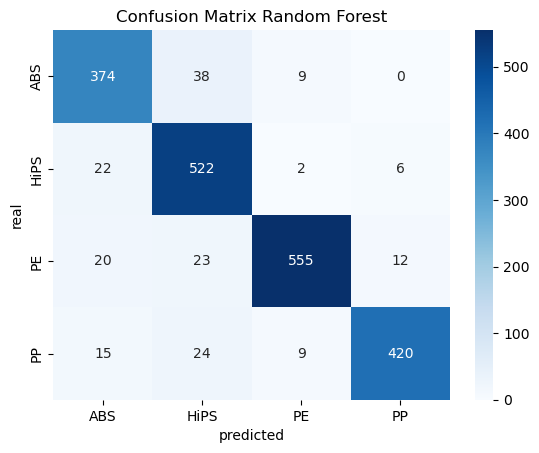

In [89]:
rf_model = RandomForestClassifier()
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=10)
rf_model.fit(X_train,y_train)
y_pred = rf_model.predict(X_test)
score = rf_model.score(X_test,y_test)
print('score without expected utility : ',score)

conf_matrix = confusion_matrix(y_test, y_pred)

# Display the confusion matrix
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=['ABS', 'HiPS', 'PE', 'PP'], yticklabels=['ABS', 'HiPS', 'PE', 'PP'])
plt.xlabel("predicted")
plt.ylabel("real")
plt.title("Confusion Matrix Random Forest")

test on the whole test dataset

RF accuracy =  0.6845441248171623


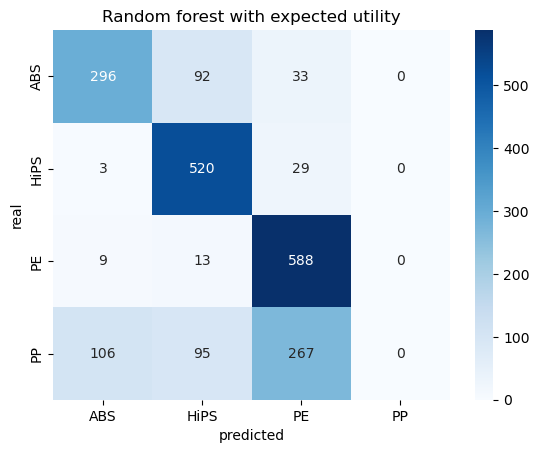

In [92]:
def test_data_set(data,y_data,rf_model):
    accuracy_score = 0
    predictions = []
    for i in range(len(data)):
        to_test = data.iloc[i:i+1]
        predicted = Choice(to_test,rf_model)
        #print(y_data.iloc[i])
        #print(predicted,y_data.iloc[i])
        predictions.append(predicted)
        if predicted == y_data.iloc[i]:
            accuracy_score+=1
    return accuracy_score/len(y_data),predictions
#print(len(X_test))

acc_rf,predictions_rf = test_data_set(X_test,y_test,rf_model)
print('RF accuracy = ',acc_rf)

conf_matrix_eu_rf = confusion_matrix(y_test, predictions_rf)

#plot the confusion matrix
sns.heatmap(conf_matrix_eu_rf, annot=True, fmt="d", cmap="Blues", xticklabels=['ABS', 'HiPS', 'PE', 'PP'], yticklabels=['ABS', 'HiPS', 'PE', 'PP'])
plt.xlabel("predicted")
plt.ylabel("real")
plt.title("Random forest with expected utility")
plt.show()

### d)

In [19]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.dummy import DummyClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
import matplotlib.pyplot as plt

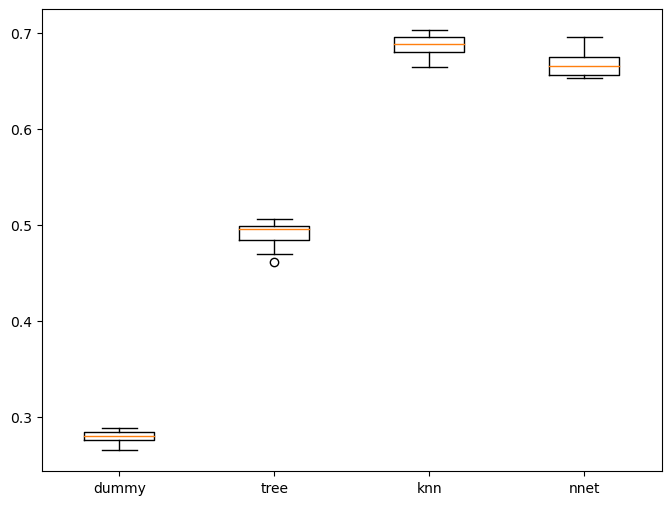

In [48]:
dummy = DummyClassifier(strategy="most_frequent")
tree = DecisionTreeClassifier(max_depth=1)
knn = KNeighborsClassifier(n_neighbors=2, n_jobs=-1) 
nnet = MLPClassifier(solver='adam', hidden_layer_sizes=(100), max_iter=1000)
N = 10
acc = [[],[],[],[]]
for i in range(N):
    X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

    dummy.fit(X_train, y_train)
    tree.fit(X_train, y_train)
    knn.fit(X_train, y_train)
    nnet.fit(X_train, y_train)

    
    acc[0].append(test_data_set(X_test,y_test,dummy))
    acc[1].append(test_data_set(X_test,y_test,tree))
    acc[2].append(test_data_set(X_test,y_test,knn))
    acc[3].append(test_data_set(X_test,y_test,nnet))
    #acc.append(acc_rf)

categories= ['dummy','tree','knn','nnet',]

plt.figure(figsize=(8, 6))
plt.boxplot(acc, labels=categories)
plt.show()

# Exercice 3

### b)

In [56]:
from math import exp

def fit_gamma(train_label, dist, classes):
    gamma = []
    nbC = len(classes)
    #print(nbC)
    for i in range(nbC-1):
        C_indices = [t for t in range(len(train_label)) if (train_label[t] == classes[i])]
        C_dist = []
        for ci in range(len(C_indices)):
            for cj in range(ci + 1, len(C_indices)):
                C_dist.append(dist[C_indices[ci]][C_indices[cj]])
        gamma.append(1 / np.mean(C_dist))
    return gamma

def phi(i,d,gamma):
    return 0.95*exp(-gamma[i-1]*(d**2))

Gamma calculation

In [28]:
from scipy.spatial.distance import pdist, squareform

distances = pdist(X.values, metric='euclidean')
dist_matrix = squareform(distances)

In [29]:
classe = list(Y.unique())
classe.append('THETA')

coeff_gamma = fit_gamma(Y.values, dist_matrix, classe)
print(coeff_gamma)

[0.3839455080424259, 0.3740745034701214, 0.21525963183591018, 0.19154623203057225]


Classification code

In [40]:
def voisins1(y, k, dist):
    # Trier les distances et conserver les indices originaux
    sorted_indices = np.argsort(dist)
    k_smallest_indices = sorted_indices[:k]  # Sélectionner les indices des k plus petites distances
    #print(k_smallest_indices)
    #print(len(y))
    # Récupérer les k plus petites distances et les classes associées
    k_smallest_distances = dist[k_smallest_indices]
    k_smallest_classes = y.iloc[k_smallest_indices]
    
    return k_smallest_distances, k_smallest_classes

In [72]:
def eknn_single_value(x,k,X_train,y_train):
    
    distances = np.sqrt(np.sum((X_train.values - x) ** 2, axis=1))
    
    distances_voisins,classes = voisins1(y_train,k,distances)
    #print(classes)
    M_ABS = 1
    M_Hips = 1
    M_PE = 1
    M_PP = 1
    
    for i in range(len(distances_voisins)):
        distance_temp = distances_voisins[i]
        classe_temps = classes.values[i]
        #print('distance_temp : ',distance_temp)
        if classe_temps == 'ABS' :
            M_ABS = M_ABS*(1-phi(1,distance_temp,coeff_gamma))
        if classe_temps == 'HiPS' :
            M_Hips = M_Hips*(1-phi(2,distance_temp,coeff_gamma))
        if classe_temps == 'PE' :
            M_PE = M_PE*(1-phi(3,distance_temp,coeff_gamma))
        if classe_temps == 'PP' :
            M_PP = M_PP*(1-phi(4,distance_temp,coeff_gamma))
            

    m_ABS=[1-M_ABS, M_ABS]
    m_HIPS=[1-M_Hips, M_Hips]
    m_PE=[1-M_PE, M_PE]
    m_PP=[1-M_PP, M_PP]
        
    m_j =  np.array([m_ABS, m_HIPS, m_PE, m_PP])
    #print(m_j)
    
    product = np.prod(m_j[:,1]) # empty prediction
    #print('pro : ', product)
    sum = 0
    for i in range(4):
        sum += m_j[i][0]*m_j[(i+1)%4][1]*m_j[(i+2)%4][1]*m_j[(i+3)%4][1]
    n_factor = product + sum
    #print('n_factor',n_factor)
    # calcul m = [m({ABS}), m({HIPS}), m({PE}), m({PP}), m(THETA)]
    m = np.zeros(5)
    for i in range(4):
        m[i] = ( m_j[i][0]*m_j[(i+1)%4][1]*m_j[(i+2)%4][1]*m_j[(i+3)%4][1] ) / n_factor

    m[4] = product / n_factor
    return m

### d)

In [73]:
def eknn_utility_single(x,x_train,y_train,k):
    probs = list(eknn_single_value(x,k,x_train,y_train))
    
    act1 = new_EU('ABS',probs[0],probs[1],probs[2],probs[4])
    act2 = new_EU('HiPS',probs[0],probs[1],probs[2],probs[4])
    act3 = new_EU('PE',probs[0],probs[1],probs[2],probs[4])
    act4 = new_EU('PP',probs[0],probs[1],probs[2],probs[4])
    v = [act1, act2, act3, act4]
    max_index = v.index(max(v))
    #print(v)
    plastic = ['ABS', 'HiPS', 'PE', 'PP']
    return plastic[max_index]
    

### d)

In [76]:
def eknn_utility(x,y,x_train,y_train,k):
    accuracy = 0
    for i in range(len(x)-1):
        predicted = eknn_utility_single(x.values[i],x_train,y_train,k)
        #print(y.iloc[i])
        if predicted == y.iloc[i]:
            accuracy += 1
    return accuracy/(len(x)-1)
        
print('eknn accuracy = ',eknn_utility(X_test,y_train,X_test,y_test,50))

eknn accuracy =  0.2682926829268293
